In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-dataset/training.1600000.processed.noemoticon.csv
/kaggle/input/sentiment-analysis-dataset/train.csv
/kaggle/input/sentiment-analysis-dataset/testdata.manual.2009.06.14.csv
/kaggle/input/sentiment-analysis-dataset/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv',encoding='latin1');
test_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv',encoding='latin1');


In [3]:
print(train_data.columns)


Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')


In [4]:
train_data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


       Population -2020  Land Area (Km²)  Density (P/Km²)
count      2.748100e+04     2.748100e+04     27481.000000
mean       4.018497e+07     6.621730e+05       357.686583
std        1.504946e+08     1.807425e+06      2013.750702
min        8.010000e+02     0.000000e+00         2.000000
25%        1.968001e+06     2.281000e+04        35.000000
50%        8.655535e+06     1.118900e+05        89.000000
75%        2.843594e+07     5.279700e+05       214.000000
max        1.439324e+09     1.637687e+07     26337.000000


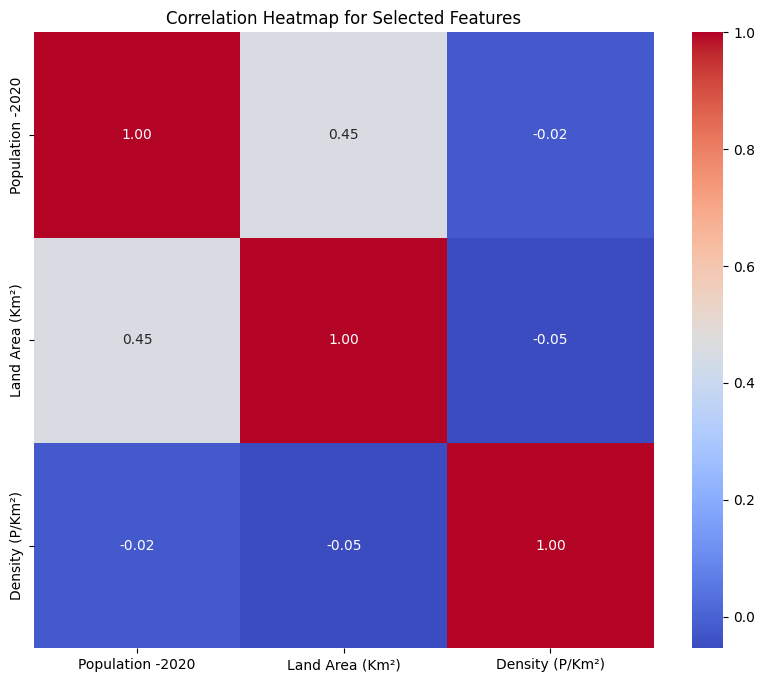

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print(train_data.describe())

subset_cols = ['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']

# Extracting the subset of data with the selected columns
subset_data = train_data[subset_cols]

# Calculating the correlation matrix
correlation_matrix = subset_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Features')
plt.show()


       Population -2020  Land Area (Km²)  Density (P/Km²)
count      2.748100e+04     2.748100e+04     27481.000000
mean       4.018497e+07     6.621730e+05       357.686583
std        1.504946e+08     1.807425e+06      2013.750702
min        8.010000e+02     0.000000e+00         2.000000
25%        1.968001e+06     2.281000e+04        35.000000
50%        8.655535e+06     1.118900e+05        89.000000
75%        2.843594e+07     5.279700e+05       214.000000
max        1.439324e+09     1.637687e+07     26337.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


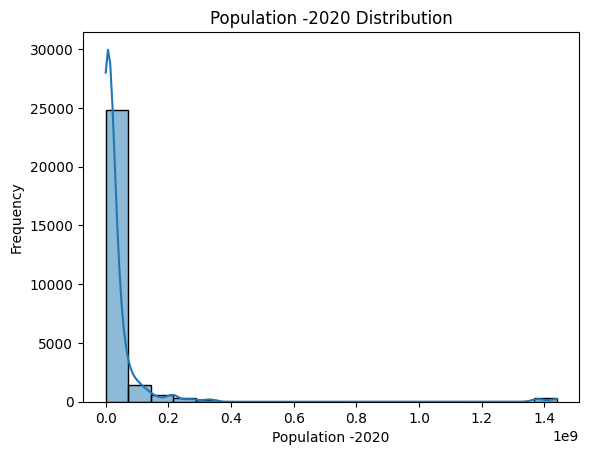

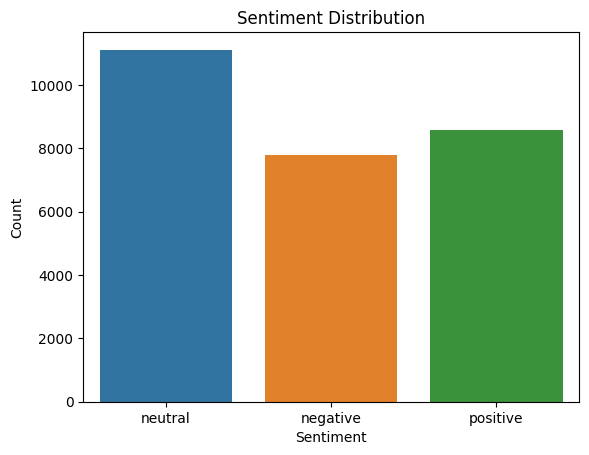

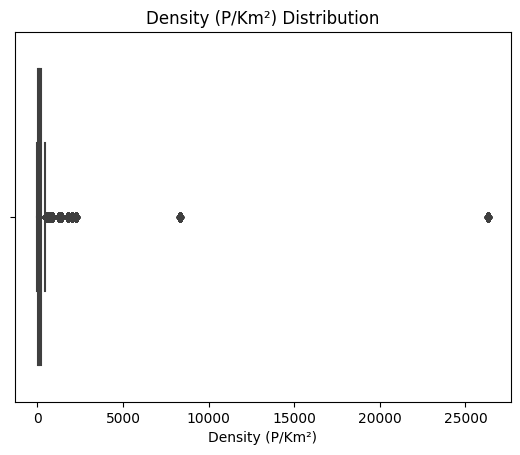

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


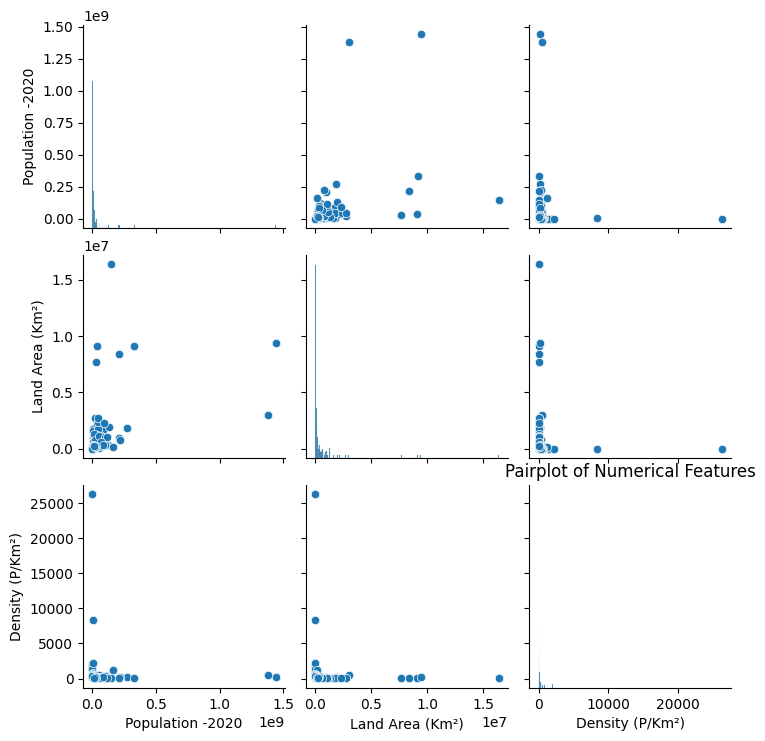

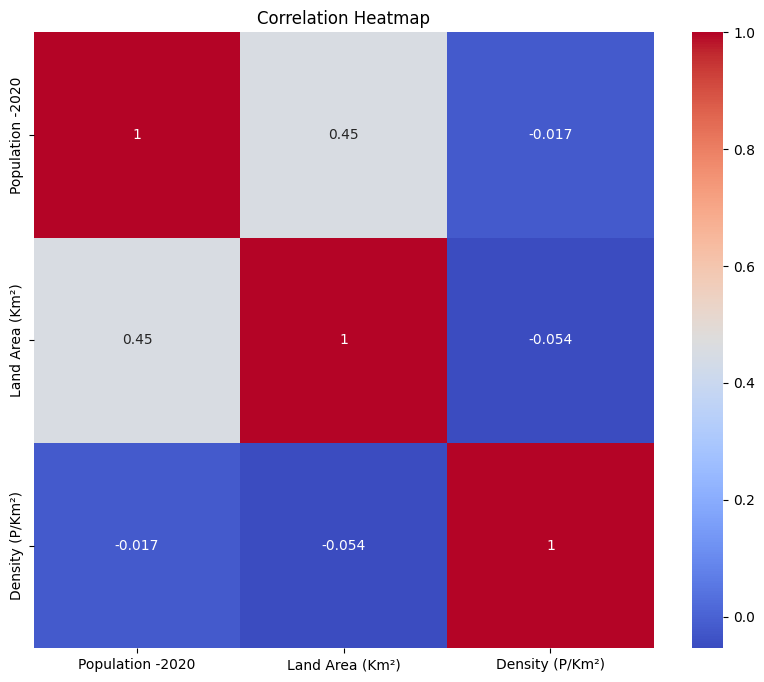

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64
           textID                                               text  \
13     04dd1d2e34  i want to go to music tonight but i lost my vo...   
23     9ce5570064  gotta restart my computer .. I thought Win7 wa...   
36     2724775d6b  Born and raised in NYC and living in Texas for...   
45     a9d499e123  The girl in the hair salon asked me 'Shall I t...   
51     15d5f3a41b   also bored at school, its my third freelesson...   
...           ...                                                ...   
27447  a9f0aa00e2  is having carbonara for dinner made by my mum mom   
27456  d32efe060f     i wanna leave work already! Not feelin it 2day   
27462  3f9912ec7a  Just back from bingo w/family -- I won over $1...   
27468  a753a93e45  few grilled mushrooms and ol

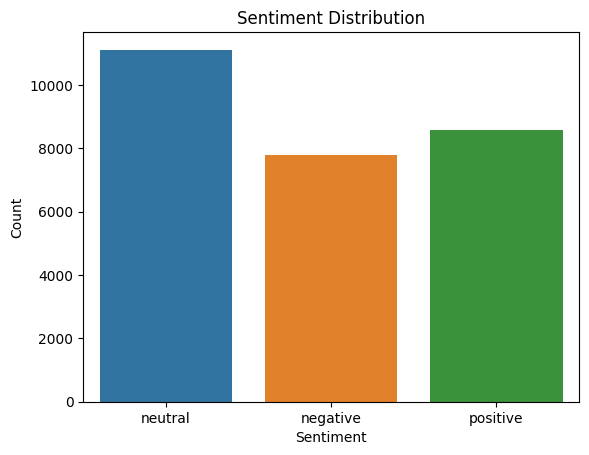

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(train_data.describe())

# Data visualization
sns.histplot(train_data['Population -2020'], bins=20, kde=True)
plt.title('Population -2020 Distribution')
plt.xlabel('Population -2020')
plt.ylabel('Frequency')
plt.show()

sns.countplot(x='sentiment', data=train_data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

sns.boxplot(x='Density (P/Km²)', data=train_data)
plt.title('Density (P/Km²) Distribution')
plt.xlabel('Density (P/Km²)')
plt.show()

sns.pairplot(train_data[['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']])
plt.title('Pairplot of Numerical Features')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(train_data[['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Missing values
print(train_data.isnull().sum())

# Outlier detection
Q1 = train_data['Population -2020'].quantile(0.25)
Q3 = train_data['Population -2020'].quantile(0.75)
IQR = Q3 - Q1
print(train_data[(train_data['Population -2020'] < (Q1 - 1.5 * IQR)) | (train_data['Population -2020'] > (Q3 + 1.5 * IQR))])

# Class distribution
sns.countplot(x='sentiment', data=train_data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Feature importance (if applicable)
# Perform feature importance analysis using appropriate models like RandomForest, XGBoost, etc.

# Additional data quality checks and feature engineering as needed


In [16]:
import pandas as pd

# Load data
train_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv', encoding='latin1')
test_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv', encoding='latin1')

# Subset data
train_data = train_data.sample(n=7000, random_state=42)
test_data = test_data.sample(n=3000, random_state=42)

# Keep necessary columns
train_data = train_data[['text', 'sentiment', 'Age of User', 'Country']]
test_data = test_data[['text', 'sentiment', 'Age of User', 'Country']]


In [17]:
# Lowercasing
train_data['text'] = train_data['text'].str.lower()
test_data['text'] = test_data['text'].str.lower()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
train_data.dropna(subset=['text'], inplace=True)
test_data.dropna(subset=['text'], inplace=True)
# Feature engineering (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_data['text'])
X_test = tfidf_vectorizer.transform(test_data['text'])

y_train = train_data['sentiment']
y_test = test_data['sentiment']


In [8]:
from sklearn.linear_model import LogisticRegression

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:
from sklearn.metrics import accuracy_score

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6694026447788418


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load data
data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv', encoding='latin1')

# Subset data
data = data.sample(n=10000, random_state=42)

# Keep necessary columns
data = data[['selected_text', 'sentiment']]

# Drop missing values
data.dropna(subset=['selected_text'], inplace=True)

# Preprocessing Text
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['processed_text'] = data['selected_text'].apply(preprocess_text)

# Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text'])
y = data['sentiment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sentiment Classification (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Sentiment Analysis Techniques
accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred)

print("Random Forest Accuracy:", accuracy)
print("Random Forest Classification Report:")
print(report)


Random Forest Accuracy: 0.7685
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.76      0.72       565
     neutral       0.79      0.79      0.79       818
    positive       0.85      0.74      0.79       617

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load data
train_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv', encoding='latin1')
test_data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv', encoding='latin1')


# Keep necessary columns
train_data = train_data[['text', 'sentiment']]
test_data = test_data[['text', 'sentiment']]

# Drop missing values
train_data.dropna(subset=['text'], inplace=True)
test_data.dropna(subset=['text'], inplace=True)

# Encode labels
label_encoder = LabelEncoder()
train_data['label'] = label_encoder.fit_transform(train_data['sentiment'])
test_data['label'] = label_encoder.transform(test_data['sentiment'])

# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['text'])

X_train = tokenizer.texts_to_sequences(train_data['text'])
X_test = tokenizer.texts_to_sequences(test_data['text'])

max_len = max(max(len(x) for x in X_train), max(len(x) for x in X_test))
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

y_train = train_data['label']
y_test = test_data['label']

# Define RNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print("RNN Model Accuracy:", accuracy)


2024-05-21 16:50:58.246856: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 16:50:58.247099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 16:50:58.444155: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


344/344 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.4077 - loss: -0.3428 - val_accuracy: 0.4127 - val_loss: -7.2439
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4010 - loss: -28.9548 - val_accuracy: 0.4127 - val_loss: -124.4679
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.4017 - loss: -225.7787 - val_accuracy: 0.4127 - val_loss: -369.6804
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4059 - loss: -567.4141 - val_accuracy: 0.4127 - val_loss: -761.9487
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4032 - loss: -898.6008 - val_accuracy: 0.4127 - val_loss: -1176.9796
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3978 - loss: -1395.9913 - val_accuracy: 0.4127 - val_loss: -1371.3075
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.3992 - loss: -2086.8030 - val_accuracy: 0.4127 - val_loss: -2202.7759
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - acc

In [12]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have already loaded the data into train_data and test_data

# Data Exploration and Understanding
print(train_data.head())
print(train_data.isnull().sum())
print(train_data.duplicated().sum())

# Feature Engineering (Example: Adding text length)
train_data['text_length'] = train_data['text'].astype(str).apply(len)


# Data Splitting
train, val_test = train_test_split(train_data, test_size=0.3, random_state=42)
validation, test = train_test_split(val_test, test_size=0.5, random_state=42)

# Text Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text)).lower()  # Convert to string
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

train['processed_text'] = train['text'].apply(preprocess_text)
validation['processed_text'] = validation['text'].apply(preprocess_text)
test['processed_text'] = test['text'].apply(preprocess_text)

# Feature Extraction (TF-IDF Vectorization)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))  # Include bigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(train['processed_text'])
X_val_tfidf = tfidf_vectorizer.transform(validation['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test['processed_text'])

# Model Selection and Training (Logistic Regression)
lr_model = LogisticRegression(max_iter=1000, C=1.0)  # Adjust C value
lr_model.fit(X_train_tfidf, train['sentiment'])

# Predictions on validation set
val_preds = lr_model.predict(X_val_tfidf)

# Evaluate accuracy
val_accuracy = accuracy_score(validation['sentiment'], val_preds)
print(f"Validation Accuracy: {val_accuracy:.2f}")


                                                text sentiment  label
0                I`d have responded, if I were going   neutral      1
1      Sooo SAD I will miss you here in San Diego!!!  negative      0
2                          my boss is bullying me...  negative      0
3                     what interview! leave me alone  negative      0
4   Sons of ****, why couldn`t they put them on t...  negative      0
text         0
sentiment    0
label        0
dtype: int64
0
Validation Accuracy: 0.68


In [13]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Assuming you have already loaded the data into train_data and test_data

# Data Exploration and Understanding
print(train_data.head())
print(train_data.isnull().sum())
print(train_data.duplicated().sum())

# Feature Engineering (Example: Adding text length)
train_data['text_length'] = train_data['text'].astype(str).apply(len)

# Data Splitting
train, val_test = train_test_split(train_data, test_size=0.3, random_state=42)
validation, test = train_test_split(val_test, test_size=0.5, random_state=42)

# Text Preprocessing
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text)).lower()  # Convert to string
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

train['processed_text'] = train['text'].apply(preprocess_text)
validation['processed_text'] = validation['text'].apply(preprocess_text)
test['processed_text'] = test['text'].apply(preprocess_text)

# Feature Extraction (TF-IDF Vectorization)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))  # Include bigrams
X_train_tfidf = tfidf_vectorizer.fit_transform(train['processed_text'])
X_val_tfidf = tfidf_vectorizer.transform(validation['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test['processed_text'])

# Model Selection and Training (Logistic Regression)
lr_model = LogisticRegression(max_iter=1000, C=1.0)  # Adjust C value
lr_model.fit(X_train_tfidf, train['sentiment'])

# Feature Selection: Identify important features
sfm = SelectFromModel(lr_model, threshold='median')
sfm.fit(X_train_tfidf, train['sentiment'])
X_train_selected = sfm.transform(X_train_tfidf)
X_val_selected = sfm.transform(X_val_tfidf)

# Retrain the model on selected features
lr_model_selected = LogisticRegression(max_iter=1000, C=1.0)
lr_model_selected.fit(X_train_selected, train['sentiment'])

# Ensemble Methods
# 1. Voting Classifier
rf_model = RandomForestClassifier(n_estimators=100)
svc_model = SVC(probability=True)
voting_classifier = VotingClassifier(estimators=[
    ('lr', lr_model_selected),
    ('rf', rf_model),
    ('svc', svc_model)
], voting='soft')  # 'soft' for probability-based voting
voting_classifier.fit(X_train_selected, train['sentiment'])
val_preds_voting = voting_classifier.predict(X_val_selected)

# 2. Stacking Classifier
base_models = [
    ('lr', lr_model_selected),
    ('rf', rf_model),
    ('svc', svc_model)
]
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_classifier.fit(X_train_selected, train['sentiment'])
val_preds_stacking = stacking_classifier.predict(X_val_selected)

# 3. Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=10)
bagging_classifier.fit(X_train_selected, train['sentiment'])
val_preds_bagging = bagging_classifier.predict(X_val_selected)

# 4. AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000), n_estimators=50)
adaboost_classifier.fit(X_train_selected, train['sentiment'])
val_preds_adaboost = adaboost_classifier.predict(X_val_selected)

# Evaluate ensemble methods
print(f"Validation Accuracy (Voting Classifier): {accuracy_score(validation['sentiment'], val_preds_voting):.2f}")
print(f"Validation Accuracy (Stacking Classifier): {accuracy_score(validation['sentiment'], val_preds_stacking):.2f}")
print(f"Validation Accuracy (Bagging Classifier): {accuracy_score(validation['sentiment'], val_preds_bagging):.2f}")
print(f"Validation Accuracy (AdaBoost Classifier): {accuracy_score(validation['sentiment'], val_preds_adaboost):.2f}")


                                                text sentiment  label  \
0                I`d have responded, if I were going   neutral      1   
1      Sooo SAD I will miss you here in San Diego!!!  negative      0   
2                          my boss is bullying me...  negative      0   
3                     what interview! leave me alone  negative      0   
4   Sons of ****, why couldn`t they put them on t...  negative      0   

   text_length  
0           36  
1           46  
2           25  
3           31  
4           75  
text           0
sentiment      0
label          0
text_length    0
dtype: int64
0


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Accuracy (Voting Classifier): 0.69
Validation Accuracy (Stacking Classifier): 0.69
Validation Accuracy (Bagging Classifier): 0.66
Validation Accuracy (AdaBoost Classifier): 0.44


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load data
data = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv', encoding='latin1')

# Subset data

# Keep necessary columns
data = data[['text', 'sentiment']]

# Drop missing values
data.dropna(subset=['text'], inplace=True)

# Preprocessing Text
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['processed_text'] = data['text'].apply(preprocess_text)

# Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text'])
y = data['sentiment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sentiment Classification (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Sentiment Analysis Techniques
accuracy = accuracy_score(y_test, rf_pred)
report = classification_report(y_test, rf_pred)

print("Random Forest Accuracy:", accuracy)
print("Random Forest Classification Report:")
print(report)


Random Forest Accuracy: 0.6966885007278021
Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.58      0.65      1572
     neutral       0.65      0.73      0.69      2236
    positive       0.73      0.77      0.75      1688

    accuracy                           0.70      5496
   macro avg       0.71      0.69      0.69      5496
weighted avg       0.70      0.70      0.70      5496



In [20]:
train_data

,text,sentiment,label,text_length
0,"I`d have responded, if I were going",neutral,1,36
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,46
2,my boss is bullying me...,negative,0,25
3,what interview! leave me alone,negative,0,31
4,"Sons of ****, why couldn`t they put them on t...",negative,0,75
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,0,77
27477,I`ve wondered about rake to. The client has ...,negative,0,122
27478,Yay good for both of you. Enjoy the break - y...,positive,2,111
27479,But it was worth it ****.,positive,2,27


In [23]:
test_data

,text,sentiment,label
0,Last session of the day http://twitpic.com/67ezh,neutral,1
1,Shanghai is also really exciting (precisely -...,positive,2
2,"Recession hit Veronique Branquinho, she has to...",negative,0
3,happy bday!,positive,2
4,http://twitpic.com/4w75p - I like it!!,positive,2
...,...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative,0
3530,All alone in this old house again. Thanks for...,positive,2
3531,I know what you mean. My little dog is sinkin...,negative,0
3532,_sutra what is your next youtube video gonna b...,positive,2


In [25]:
train_data.isna().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

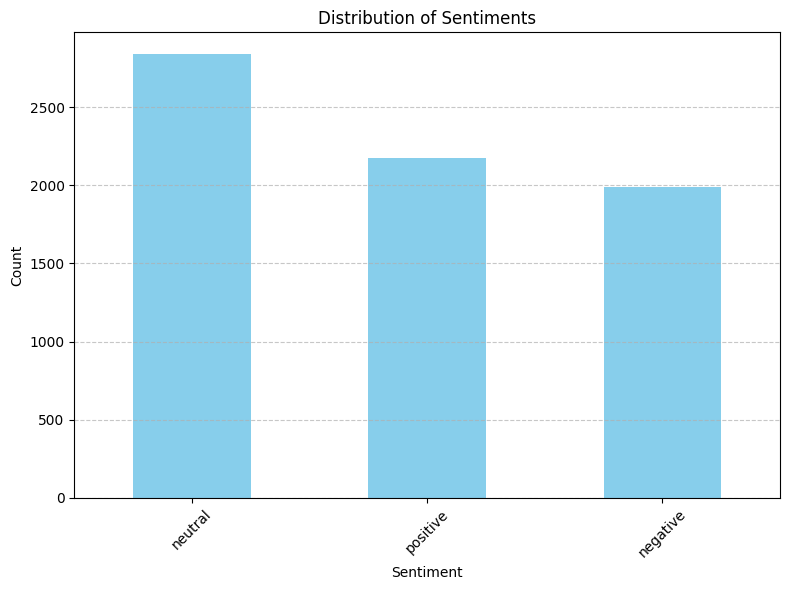

Sentiment Counts:
sentiment
neutral     2838
positive    2174
negative    1988
Name: count, dtype: int64


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into a pandas DataFrame
# Let's say your DataFrame is called df

# Check the unique values in the 'sentiment' column
sentiment_counts = train_data['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Check for class imbalances
print("Sentiment Counts:")
print(sentiment_counts)


In [33]:
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [34]:
print(train_data.head())

# Check the data types of each column
print(train_data.dtypes)

# Check the unique values in each column to determine if they are categorical or numerical
for column in train_data.columns:
    print(f"Column: {column}")
    print(train_data[column].unique())

                                                    text sentiment  \
1588    woooooooooo   are you coming to nottingham at...  positive   
23879                 resting had a whole day of walking   neutral   
6561   was in palawan a couple of days ago, i`ll try ...   neutral   
2602    i know! i`m so slow its horrible. don`t tell ...  negative   
4003   glad i went out, glad i didn`t leave early, an...  positive   

      Age of User       Country  
1588        60-70         Libya  
23879      70-100  South Africa  
6561        46-60       Ireland  
2602        60-70    Azerbaijan  
4003        21-30    Montenegro  
text           object
sentiment      object
Age of User    object
Country        object
dtype: object
Column: text
[' woooooooooo   are you coming to nottingham at any point?  lovelovelove<3'
 'resting had a whole day of walking'
 'was in palawan a couple of days ago, i`ll try to post pictures tom.' ...
 'oooh,  i have a question for you all. does your chain hang low?  idk

In [38]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
train_data['sentiment_encoded'] = label_encoder.fit_transform(train_data['sentiment'])
#train_data['Time of Tweet_encoded'] = label_encoder.fit_transform(train_data['Time of Tweet'])
train_data['Age of User_encoded'] = label_encoder.fit_transform(train_data['Age of User'])

# Perform one-hot encoding for the 'Country' column
train_data = pd.get_dummies(train_data, columns=['Country'])

# Display the encoded DataFrame
print(train_data.head())


                                                    text sentiment  \
1588    woooooooooo   are you coming to nottingham at...  positive   
23879                 resting had a whole day of walking   neutral   
6561   was in palawan a couple of days ago, i`ll try ...   neutral   
2602    i know! i`m so slow its horrible. don`t tell ...  negative   
4003   glad i went out, glad i didn`t leave early, an...  positive   

       Age of User  sentiment_encoded  Age of User_encoded  \
1588          65.0                  2                    4   
23879         85.0                  1                    5   
6561          53.0                  1                    3   
2602          65.0                  0                    4   
4003          25.5                  2                    1   

       Country_Afghanistan  Country_Albania  Country_Algeria  Country_Andorra  \
1588                 False            False            False            False   
23879                False            False 

In [56]:
import string
import numpy as np

# Define a function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Lowercase the text
        text = text.lower()

        # Remove punctuation
        text = ''.join([char for char in text if char not in string.punctuation])

        # Tokenization (split the text into words)
        words = text.split()

        # Remove stopwords (you need to have a list of stopwords)
        stopwords = set([
            'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", 
            "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 
            'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 
            'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
            'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 
            'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 
            'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 
            'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 
            'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
            'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
            'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
            'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 
            'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 
            'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
            'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', 
            "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
        ])

        words = [word for word in words if word not in stopwords]

        # Join the words back into a single string
        preprocessed_text = ' '.join(words)
    else:
        preprocessed_text = np.nan  # Return NaN for missing values

    return preprocessed_text

# Preprocess the 'text' column
train_data['text_preprocessed'] = train_data['text'].apply(preprocess_text)

# Preprocess the 'selected_text' column
train_data['selected_text_preprocessed'] = train_data['selected_text'].apply(preprocess_text)

# Display the preprocessed text
print("Preprocessed Text:")
print(train_data[['text_preprocessed', 'selected_text_preprocessed']].head())


Preprocessed Text:
                          text_preprocessed selected_text_preprocessed
0                        id responded going         id responded going
1                   sooo sad miss san diego                   sooo sad
2                             boss bullying                   bullying
3                     interview leave alone                leave alone
4  sons couldnt put releases already bought                       sons


In [61]:
import nltk

# Download specific NLTK resources manually
nltk.download('punkt', download_dir='/path/to/nltk_data')
nltk.download('stopwords', download_dir='/path/to/nltk_data')
nltk.download('vader_lexicon', download_dir='/path/to/nltk_data')


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [63]:
import pandas as pd
from collections import Counter
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Assuming you have already loaded your dataset into a pandas DataFrame named train_data

# Handle missing values by replacing them with an empty string
train_data['text'].fillna('', inplace=True)

# Word Frequency
def get_word_frequency(text):
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Count frequency
    word_freq = Counter(filtered_tokens)
    return word_freq

# Sentiment Scores using TextBlob
def get_sentiment_score_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Sentiment Scores using VADER
def get_sentiment_score_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply functions to DataFrame
train_data['word_frequency'] = train_data['text'].apply(get_word_frequency)
train_data['sentiment_score_textblob'] = train_data['text'].apply(get_sentiment_score_textblob)
train_data['sentiment_score_vader'] = train_data['text'].apply(get_sentiment_score_vader)

print(train_data.head())


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2     

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

import numpy as np

# Replace missing values (NaN) with empty strings
train_data['text_preprocessed'].fillna('', inplace=True)

# Split data into training and testing sets
X = train_data['text_preprocessed']
y = train_data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Choose a model: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6978351828269965
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.61      0.66      1562
     neutral       0.64      0.75      0.69      2230
    positive       0.77      0.71      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.70      0.70      0.70      5497



In [66]:
# Example of using Word2Vec for feature representation
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_data['text_preprocessed'], vector_size=100, window=5, min_count=1)

# Convert text to word vectors using Word2Vec
X_train_word2vec = train_data['text_preprocessed'].apply(lambda x: np.mean([word2vec_model.wv[word] for word in x.split() if word in word2vec_model.wv], axis=0))

# Example of using TF-IDF for feature representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['text_preprocessed'])


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have preprocessed text and sentiment labels in your DataFrame
# Let's say preprocessed text is in 'text_preprocessed' column and sentiment labels are in 'sentiment' column

# Load your preprocessed data


# Split data into features (X) and labels (y)
X = train_data['text_preprocessed']
y = train_data['sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print out the shapes of X_train_tfidf and y_train
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of y_train:", y_train.shape)

# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Shape of X_train_tfidf: (21984, 25056)
Shape of y_train: (21984,)
Accuracy: 0.6971075131890122


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


# Get a subset of 5000 rows from the dataset
subset_data = train_data.head(5000)

# Split data into training and testing sets
X = subset_data['text_preprocessed']
y = subset_data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define hyperparameters to search for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# Initialize SVM model
svm_model = SVC(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Initialize and train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

# Evaluate the SVM model
y_pred_svm = grid_search.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Evaluate the Gradient Boosting Classifier
y_pred_gb = gb_model.predict(X_test_tfidf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\nGradient Boosting Classifier Accuracy:", accuracy_gb)
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gb))


SVM Accuracy: 0.616
SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.64      0.48      0.55       299
     neutral       0.56      0.72      0.63       407
    positive       0.73      0.61      0.66       294

    accuracy                           0.62      1000
   macro avg       0.64      0.60      0.61      1000
weighted avg       0.63      0.62      0.61      1000


Gradient Boosting Classifier Accuracy: 0.609
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.36      0.49       299
     neutral       0.53      0.84      0.65       407
    positive       0.74      0.54      0.62       294

    accuracy                           0.61      1000
   macro avg       0.68      0.58      0.59      1000
weighted avg       0.66      0.61      0.60      1000



In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='linear'),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB(),
    'Gradient Boosting Machines': GradientBoostingClassifier(),
    # Add neural network models using TensorFlow or PyTorch
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    Accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", Accuracy)

Logistic Regression Accuracy: 0.601
Decision Trees Accuracy: 0.589
Random Forest Accuracy: 0.622
SVM Accuracy: 0.616
k-Nearest Neighbors Accuracy: 0.439
Naive Bayes Accuracy: 0.557
Gradient Boosting Machines Accuracy: 0.609


In [80]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [84]:
from textblob import TextBlob

# Function to classify sentiment
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the 'text' column
train_data['predicted_sentiment'] = train_data['text'].apply(classify_sentiment)

# Display the result
print(train_data[['text', 'predicted_sentiment']])


                                                    text predicted_sentiment
0                    I`d have responded, if I were going             neutral
1          Sooo SAD I will miss you here in San Diego!!!            negative
2                              my boss is bullying me...             neutral
3                         what interview! leave me alone             neutral
4       Sons of ****, why couldn`t they put them on t...             neutral
...                                                  ...                 ...
27476   wish we could come see u on Denver  husband l...             neutral
27477   I`ve wondered about rake to.  The client has ...            positive
27478   Yay good for both of you. Enjoy the break - y...            positive
27479                         But it was worth it  ****.            positive
27480     All this flirting going on - The ATG smiles...             neutral

[27481 rows x 2 columns]


In [87]:
# Define another text to predict sentiment
another_text = "Sooo SAD I will miss you here in San Diego!!!"

# Predict sentiment for the other text
predicted_sentiment = classify_sentiment(another_text)

# Print the predicted sentiment
print("Predicted Sentiment for the text:")
print(f"Text: {another_text}")
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment for the text:
Text: Sooo SAD I will miss you here in San Diego!!!
Predicted Sentiment: negative


In [88]:

# Define another text to predict sentiment
another_text = "I love spending time with my family"

# Predict sentiment for the other text
predicted_sentiment = classify_sentiment(another_text)

# Print the predicted sentiment
print("Predicted Sentiment for the text:")
print(f"Text: {another_text}")
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment for the text:
Text: I love spending time with my family
Predicted Sentiment: positive


In [94]:
# Define another text to predict sentiment
another_text = "Today was a terrible day at work, everything went wrong"

# Predict sentiment for the other text
predicted_sentiment = classify_sentiment(another_text)

# Print the predicted sentiment
print("Predicted Sentiment for the text:")
print(f"Text: {another_text}")
print(f"Predicted Sentiment: {predicted_sentiment}")



Predicted Sentiment for the text:
Text: Today was a terrible day at work, everything went wrong
Predicted Sentiment: negative


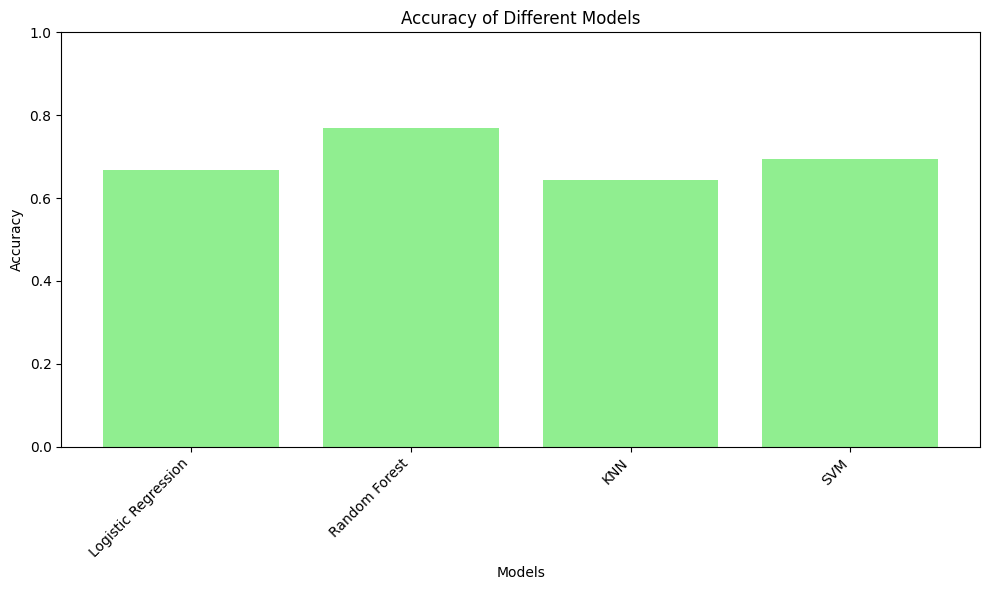

In [15]:
import matplotlib.pyplot as plt

# Define model names and corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM']
accuracies = [0.669, 0.7685, 0.6439, 0.6943231441048034]  

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
